In [1]:
load('NewData-stomach-reference20190907.RData')

In [2]:
library(Seurat)
library(Matrix)
library(ggplot2)
library(cowplot)
library(dplyr)
library(enrichR)

Registered S3 method overwritten by 'R.oo':
  method        from       
  throw.default R.methodsS3


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Welcome to enrichR
Checking connection ... 
Connection is Live!



In [3]:
library(schex)

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following object is masked from ‘package:Matrix’:

    which


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted

In [4]:
data.integrated

An object of class Seurat 
42921 features across 38416 samples within 3 assays 
Active assay: integrated (3000 features)
 2 other assays present: RNA, SCT
 2 dimensional reductions calculated: pca, umap

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


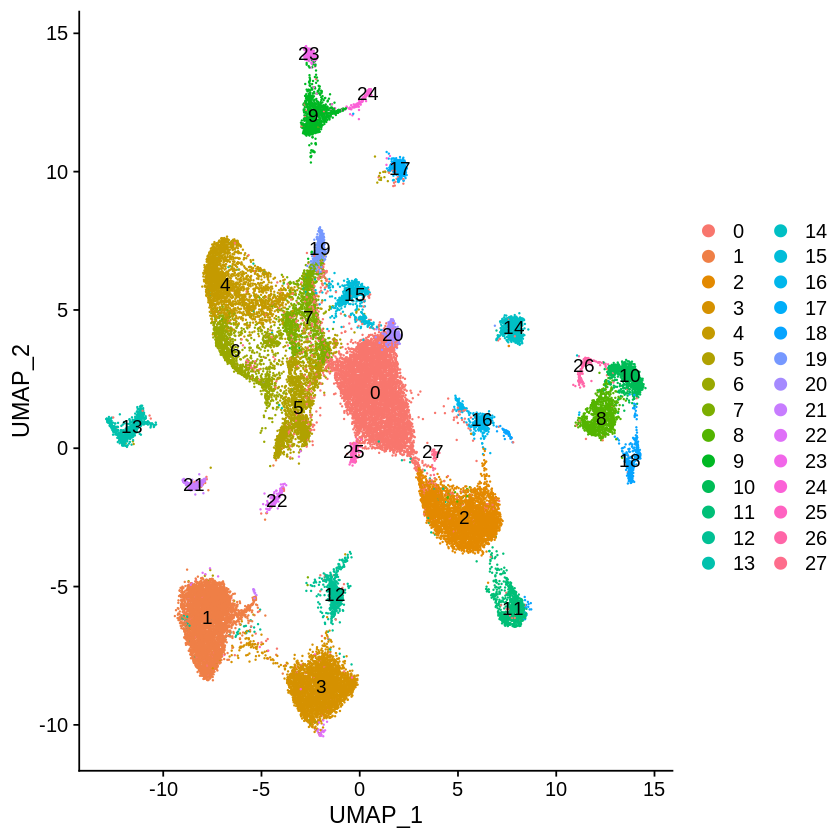

In [5]:
options(repr.plot.width=7, repr.plot.height=7)
DimPlot(data.integrated, label = TRUE)

In [32]:
data.integrated

An object of class Seurat 
42921 features across 38416 samples within 3 assays 
Active assay: integrated (3000 features)
 2 other assays present: RNA, SCT
 2 dimensional reductions calculated: pca, umap

In [33]:
DefaultAssay(data.integrated) <- 'SCT'

In [34]:
data_schex <- make_hexbin(as.SingleCellExperiment(data.integrated), nbins=60, dimension_reduction = 'UMAP')

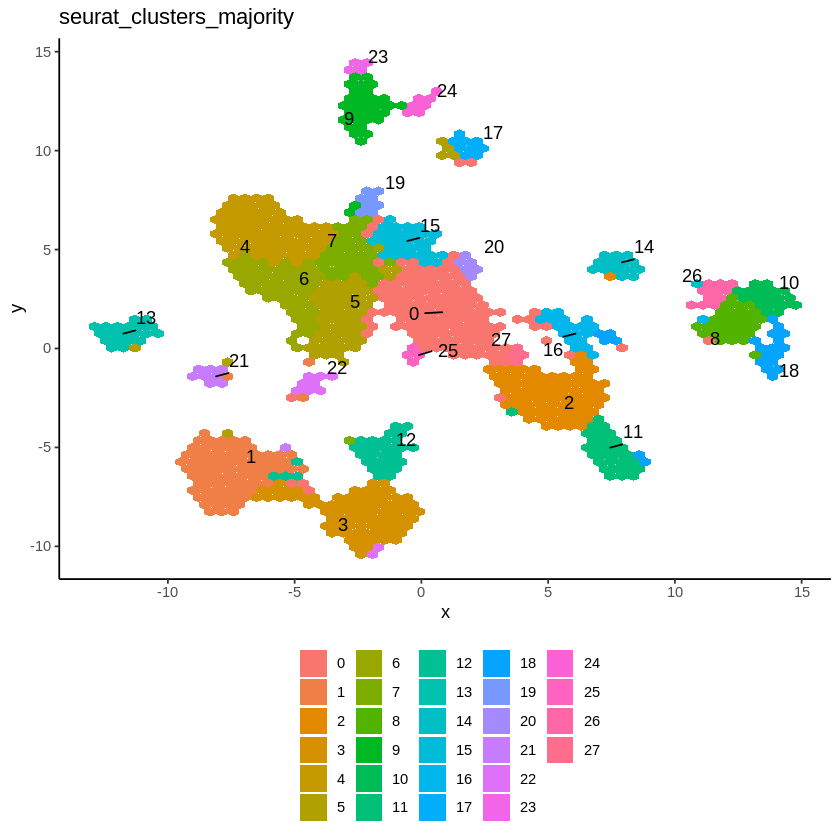

In [35]:
label_df <- make_hexbin_label(data_schex, col = "seurat_clusters")
pp <- plot_hexbin_meta(data_schex, col = "seurat_clusters", action = "majority")
pp + ggrepel::geom_label_repel(data = label_df, aes(x = x, y = y, label = label), colour = "black", 
    label.size = NA, fill = NA)

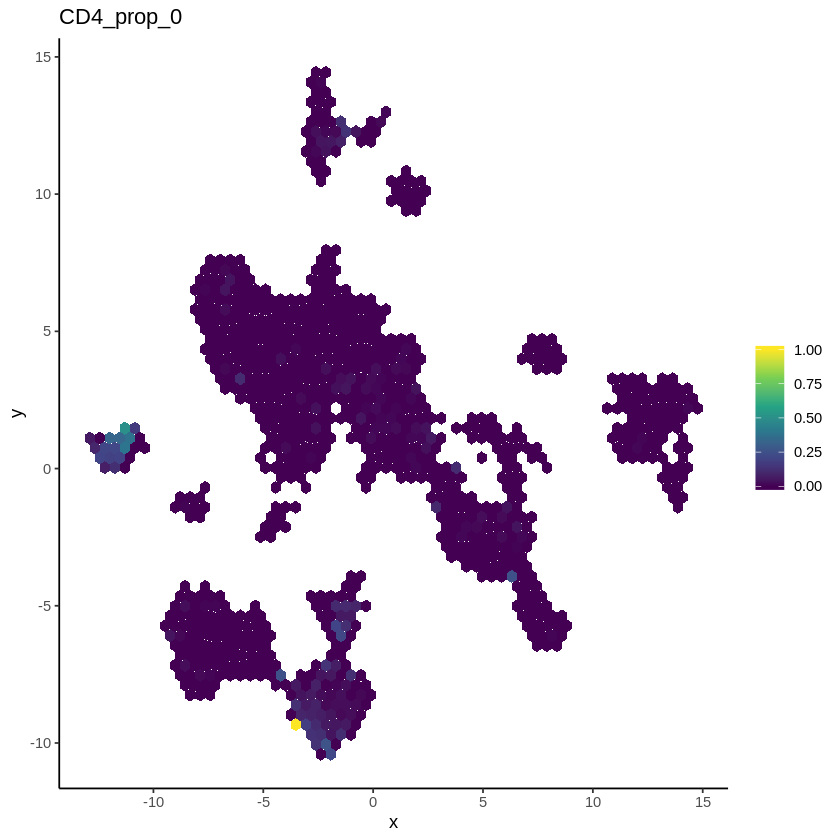

In [36]:
p1 <- plot_hexbin_gene(data_schex, type='logcounts',gene='CD4',action='prop_0')
plot(p1)

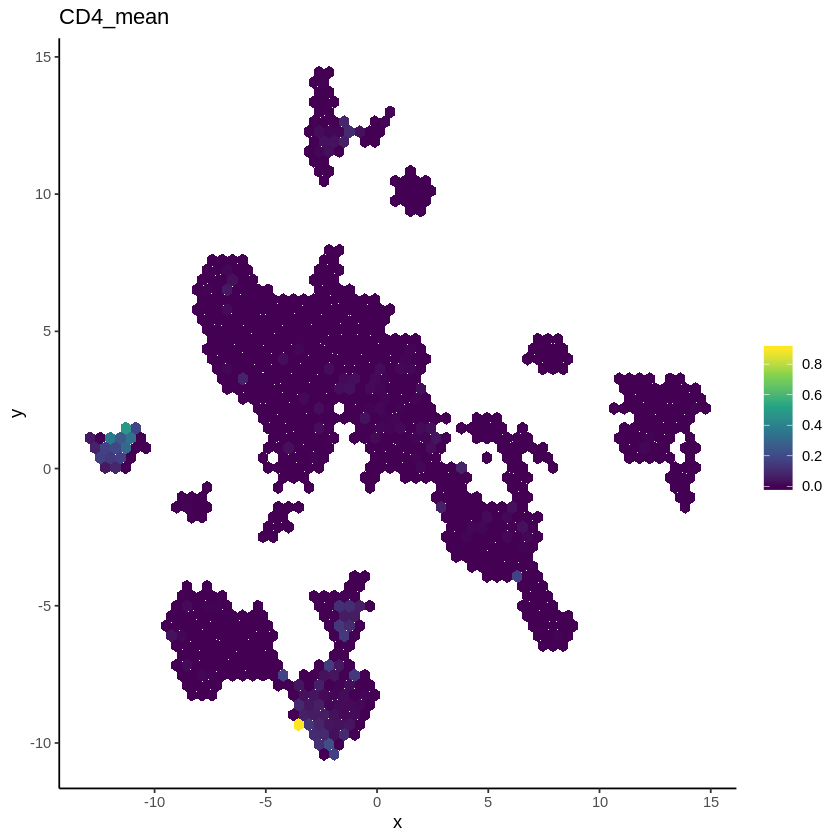

In [37]:
p1 <- plot_hexbin_gene(data_schex, type='logcounts',gene='CD4',action='mean')
plot(p1)

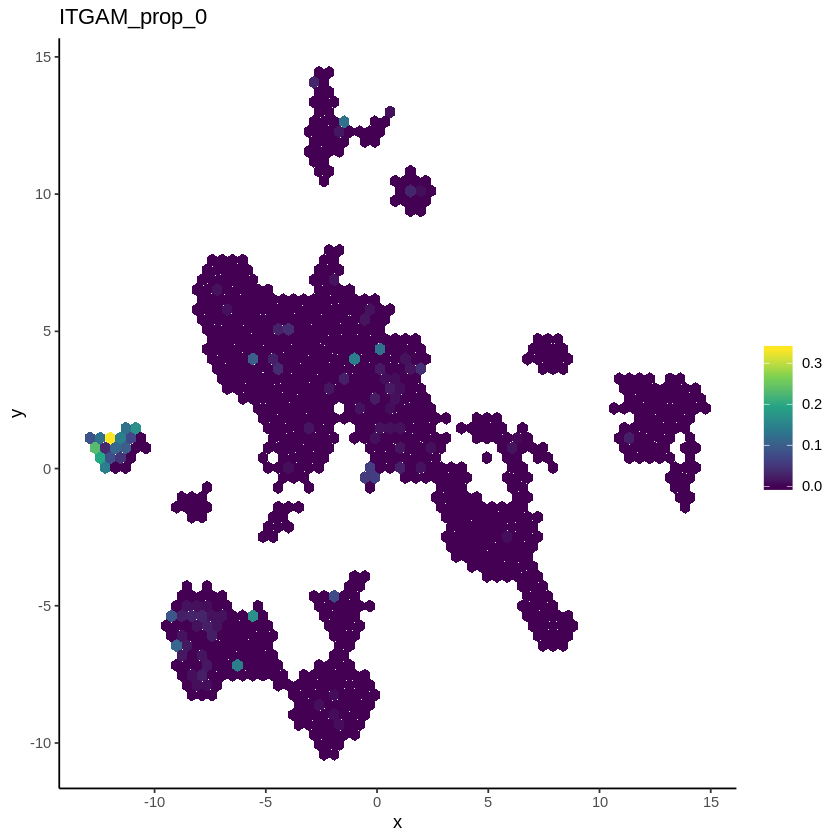

In [38]:
# ITGAM = CD11B
p1 <- plot_hexbin_gene(data_schex, type='logcounts',gene='ITGAM',action='prop_0')
plot(p1)

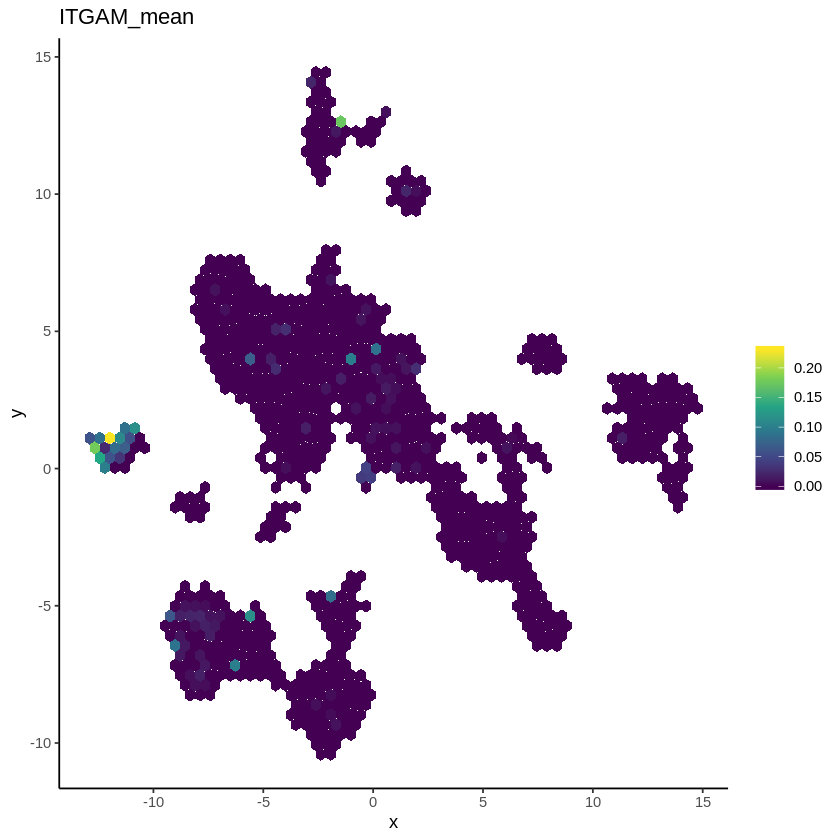

In [39]:
# ITGAM = CD11B
p1 <- plot_hexbin_gene(data_schex, type='logcounts',gene='ITGAM',action='mean')
plot(p1)

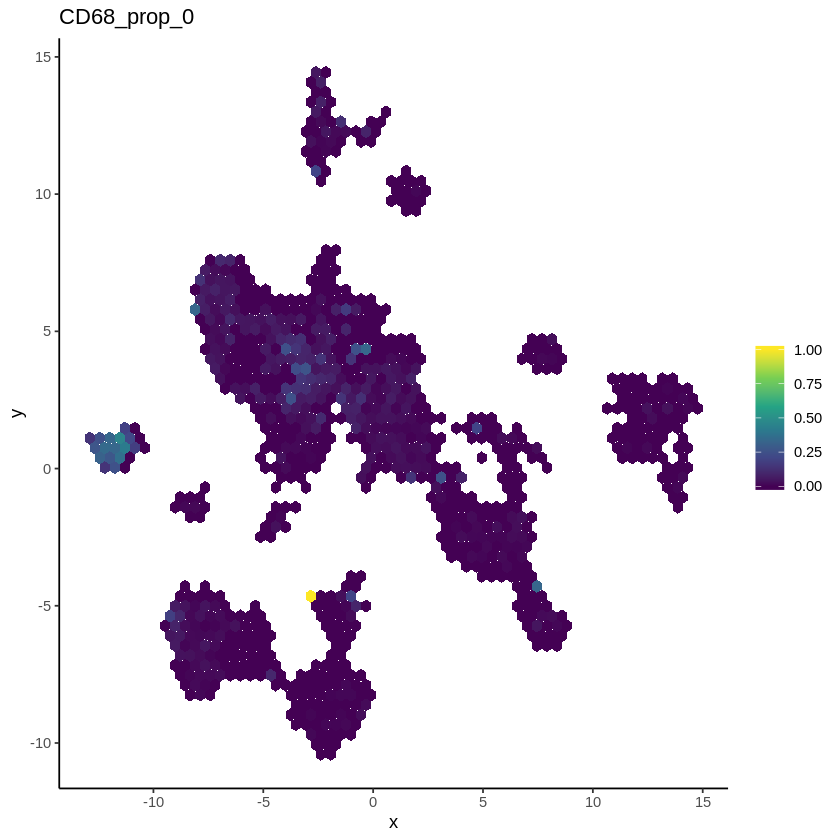

In [40]:
p1 <- plot_hexbin_gene(data_schex, type='logcounts',gene='CD68',action='prop_0')
plot(p1)

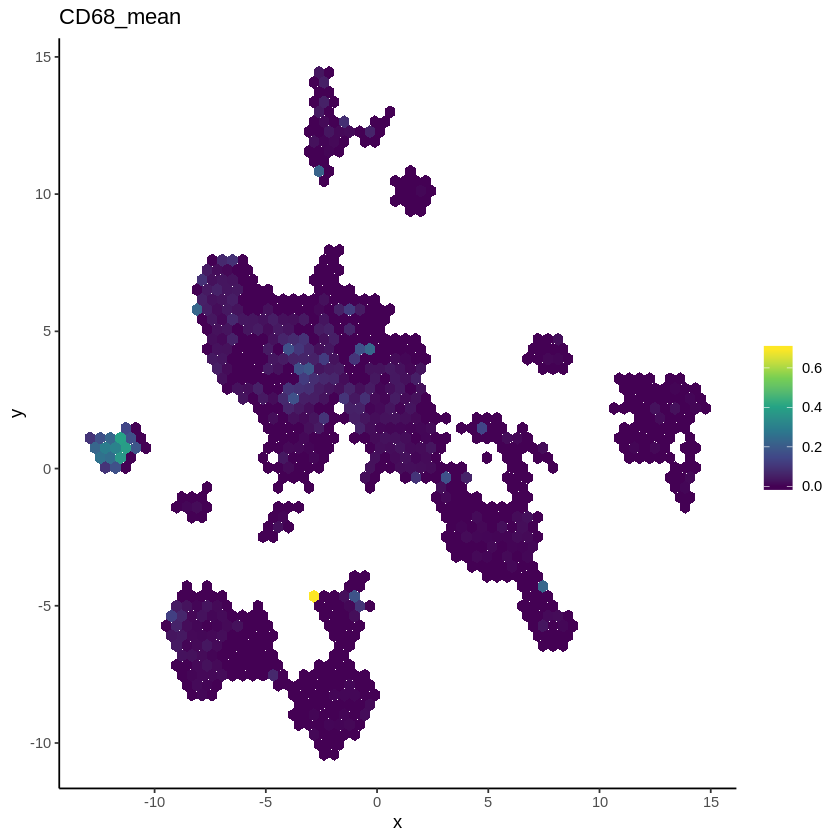

In [41]:
p1 <- plot_hexbin_gene(data_schex, type='logcounts',gene='CD68',action='mean')
plot(p1)

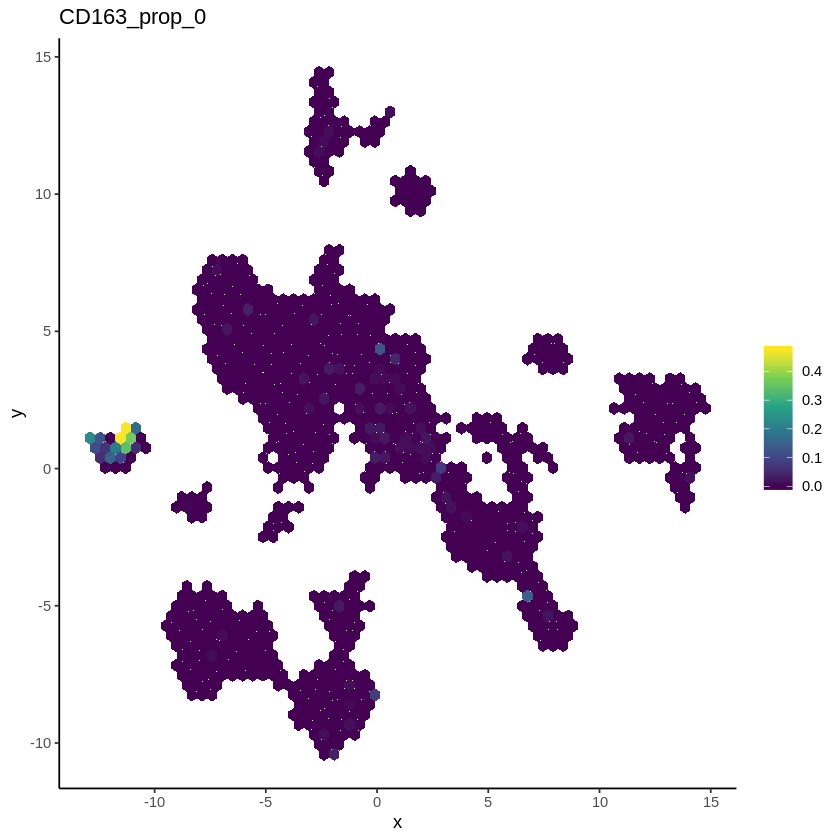

In [42]:
p1 <- plot_hexbin_gene(data_schex, type='logcounts',gene='CD163',action='prop_0')
plot(p1)

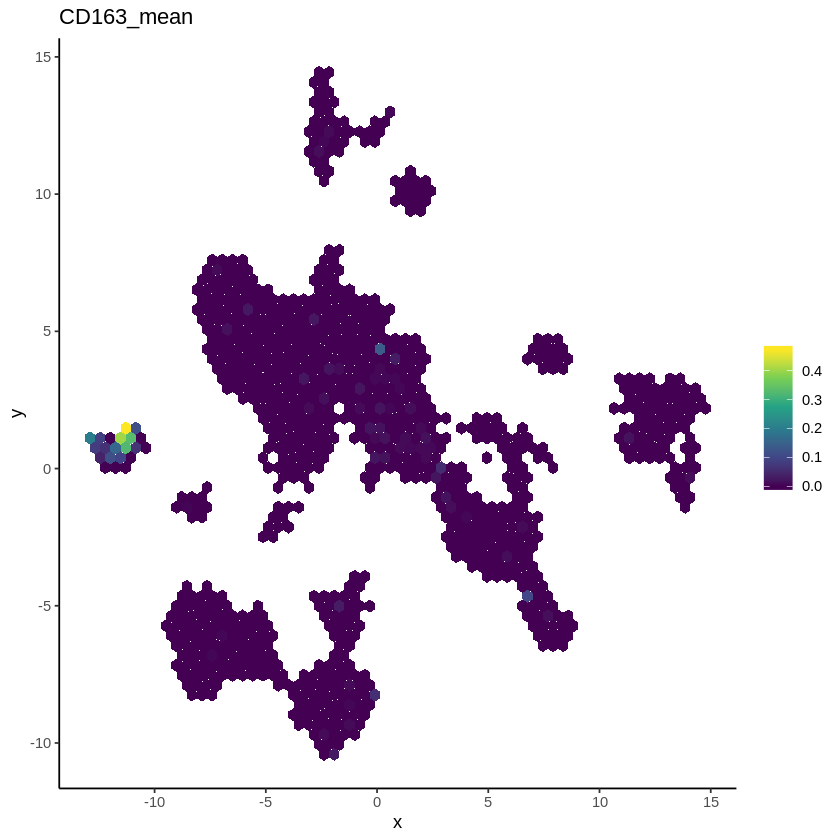

In [43]:
p1 <- plot_hexbin_gene(data_schex, type='logcounts',gene='CD163',action='mean')
plot(p1)

HLA-DRA

HLA-DRB1

HLA-DRB3

HLA-DRB4

HLA-DRB5

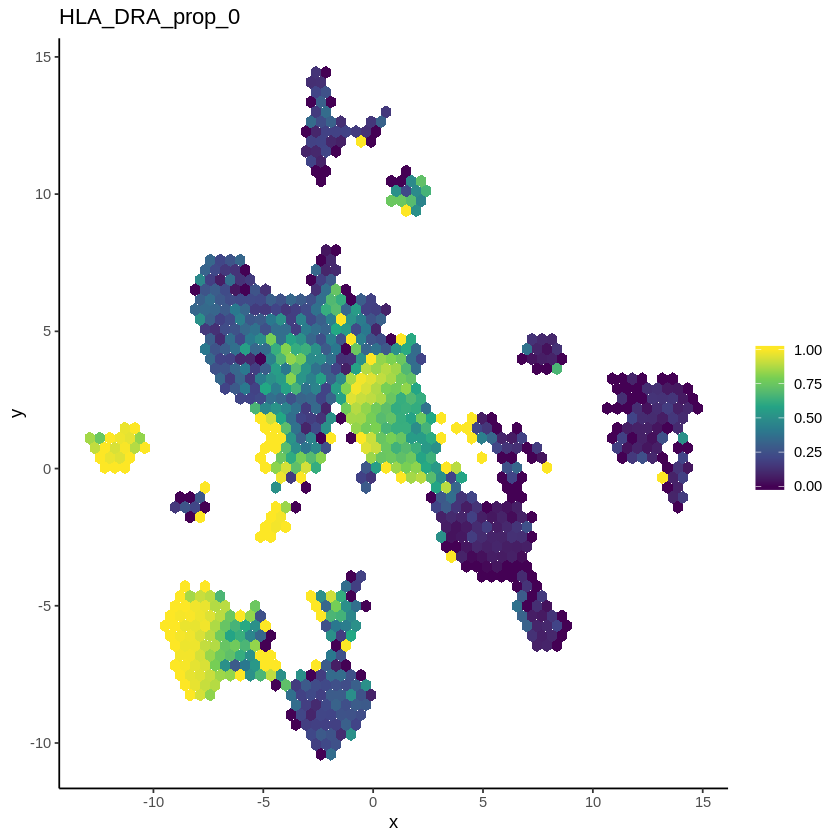

In [44]:
p1 <- plot_hexbin_gene(data_schex, type='logcounts',gene='HLA-DRA',action='prop_0')
plot(p1)

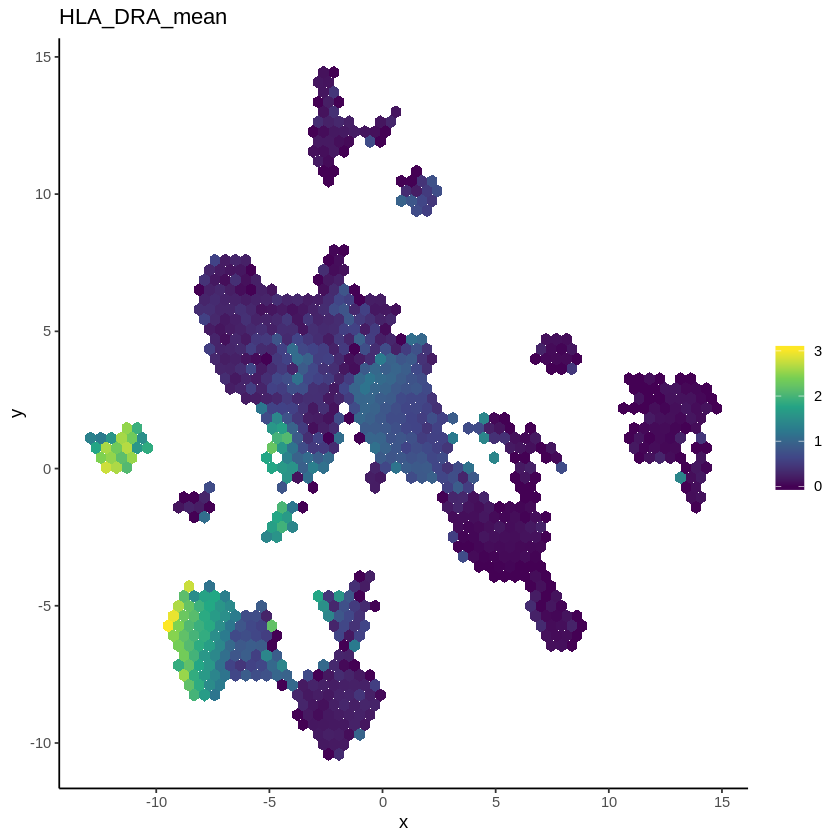

In [45]:
p1 <- plot_hexbin_gene(data_schex, type='logcounts',gene='HLA-DRA',action='mean')
plot(p1)

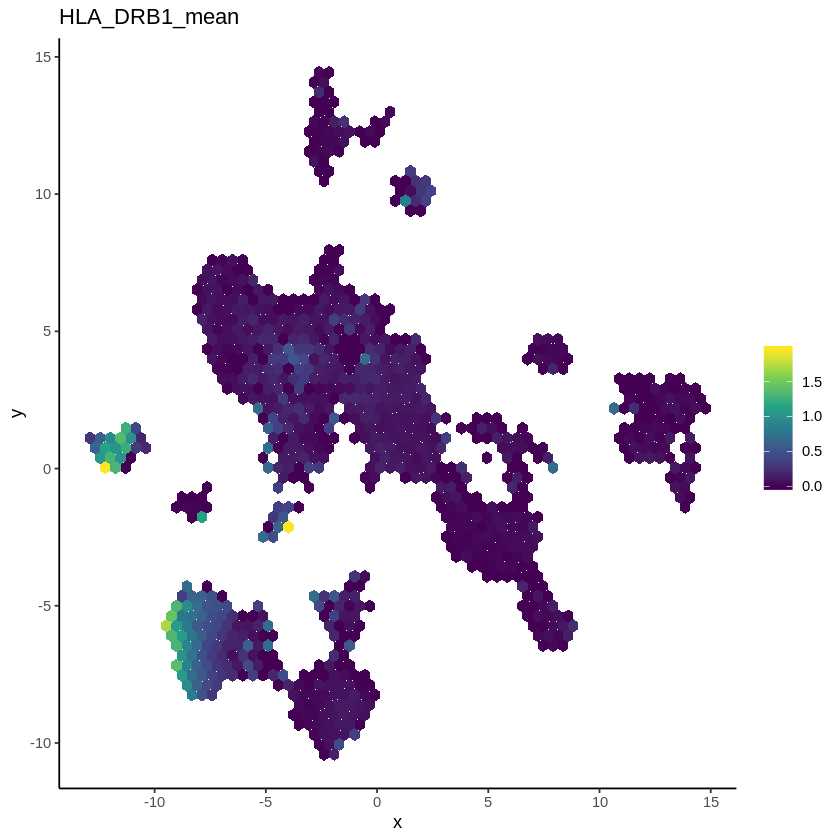

In [46]:
p1 <- plot_hexbin_gene(data_schex, type='logcounts',gene='HLA-DRB1',action='mean')
plot(p1)

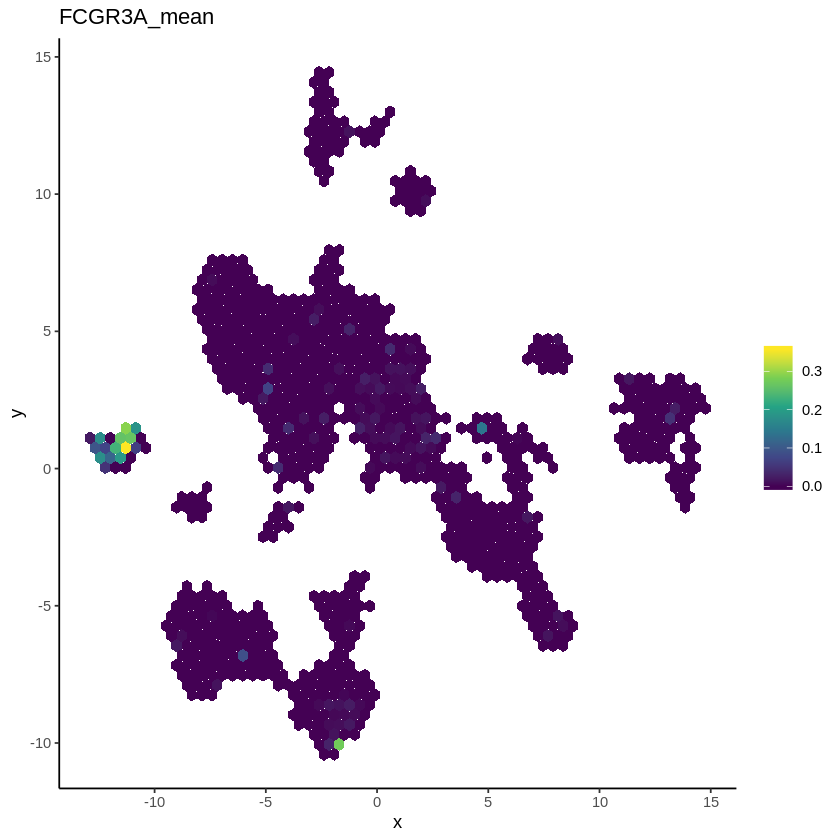

In [47]:
p1 <- plot_hexbin_gene(data_schex, type='logcounts',gene='FCGR3A',action='mean')
plot(p1)

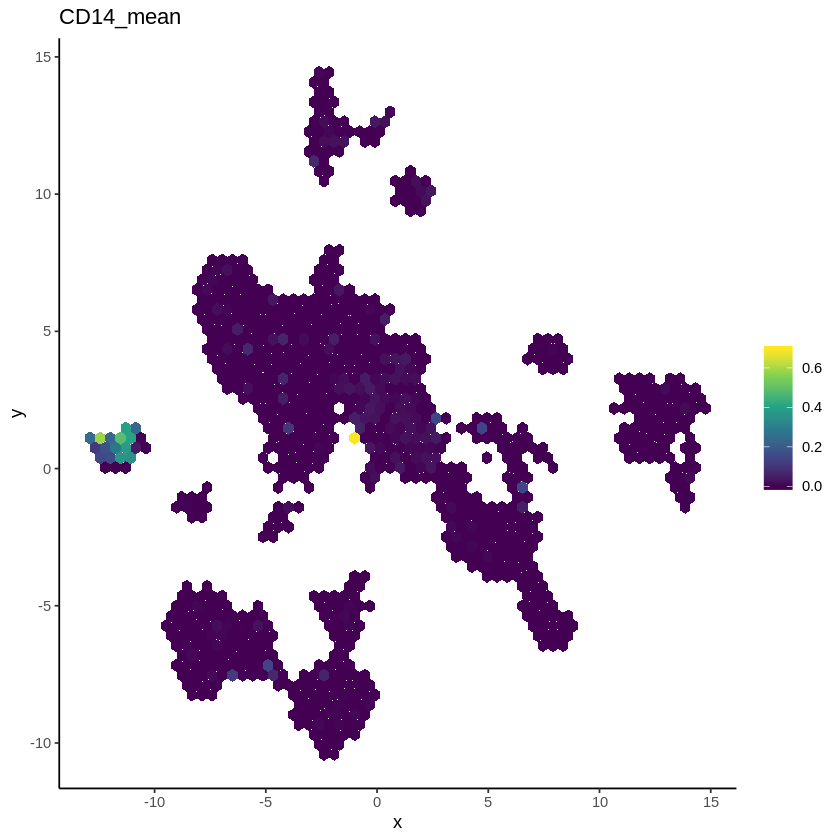

In [49]:
p1 <- plot_hexbin_gene(data_schex, type='logcounts',gene='CD14',action='mean')
plot(p1)

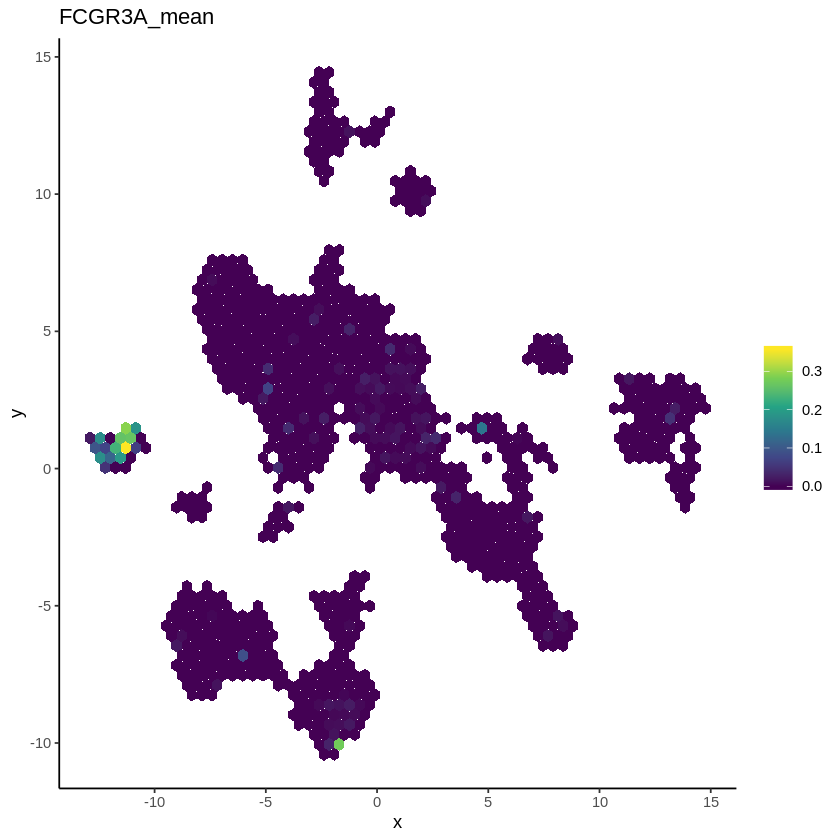

In [51]:
p1 <- plot_hexbin_gene(data_schex, type='logcounts',gene='FCGR3A',action='mean')
plot(p1)

### -> Cluster13がMacrophage?

In [53]:
Idents(data.integrated) <- 'seurat_clusters'

In [55]:
data.cluster13 <- subset(data.integrated, idents = 13)

In [58]:
DefaultAssay(data.cluster13) <- 'integrated'

In [59]:
reticulate::import(module = "umap")

Module(umap)

In [61]:
data.cluster13 <- RunPCA(data.cluster13, verbose = FALSE)

In [62]:
data.cluster13 <- RunUMAP(data.cluster13, dims = 1:30, verbose = FALSE, umap.method = 'umap-learn', metric = 'correlation')

In [63]:
data.cluster13 <- FindNeighbors(data.cluster13, dims = 1:30, verbose = FALSE)
data.cluster13 <- FindClusters(data.cluster13, verbose = FALSE)

In [64]:
data.cluster13@active.assay <- 'SCT'

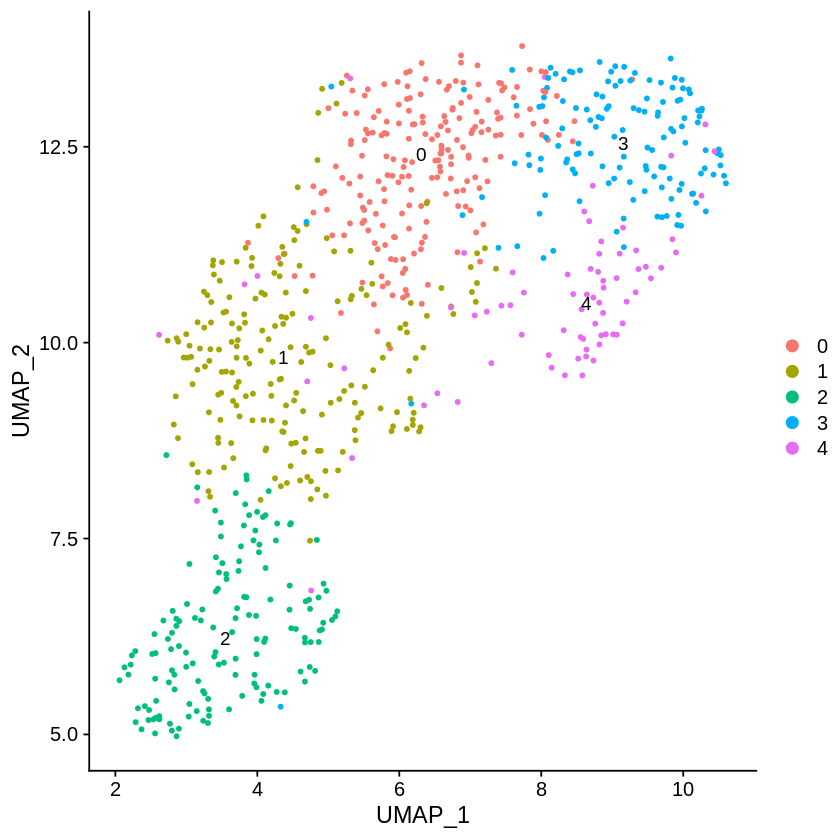

In [65]:
DimPlot(data.cluster13, label = TRUE)

In [66]:
data.cluster13

An object of class Seurat 
42921 features across 761 samples within 3 assays 
Active assay: SCT (18247 features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

In [67]:
DefaultAssay(data.cluster13) <- 'SCT'

In [70]:
data_schex <- make_hexbin(as.SingleCellExperiment(data.cluster13), nbins=30, dimension_reduction = 'UMAP')

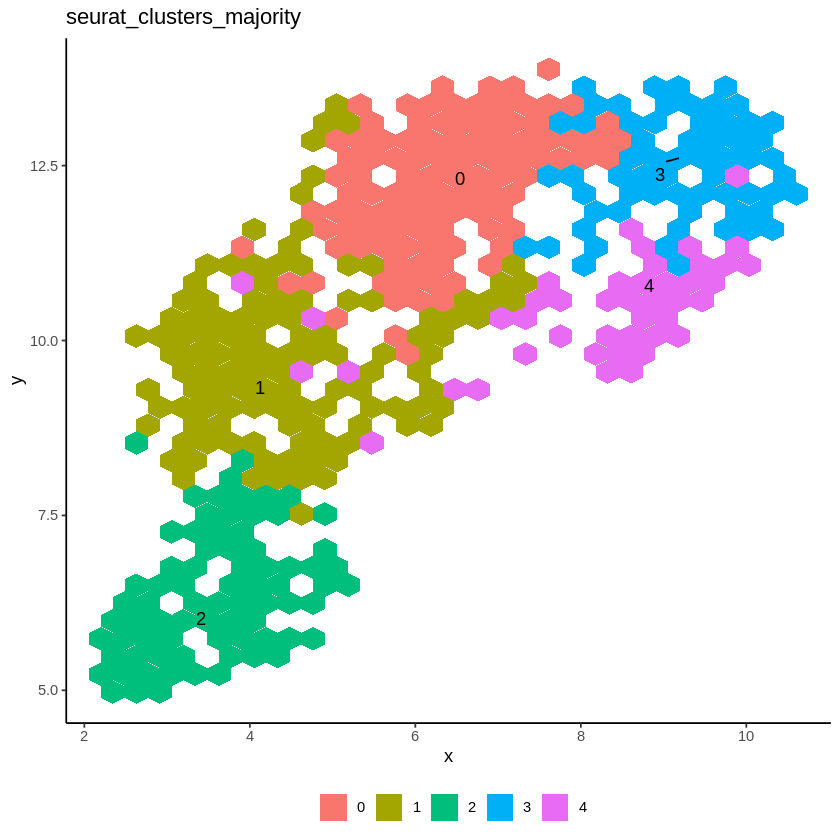

In [71]:
label_df <- make_hexbin_label(data_schex, col = "seurat_clusters")
pp <- plot_hexbin_meta(data_schex, col = "seurat_clusters", action = "majority")
pp + ggrepel::geom_label_repel(data = label_df, aes(x = x, y = y, label = label), colour = "black", 
    label.size = NA, fill = NA)

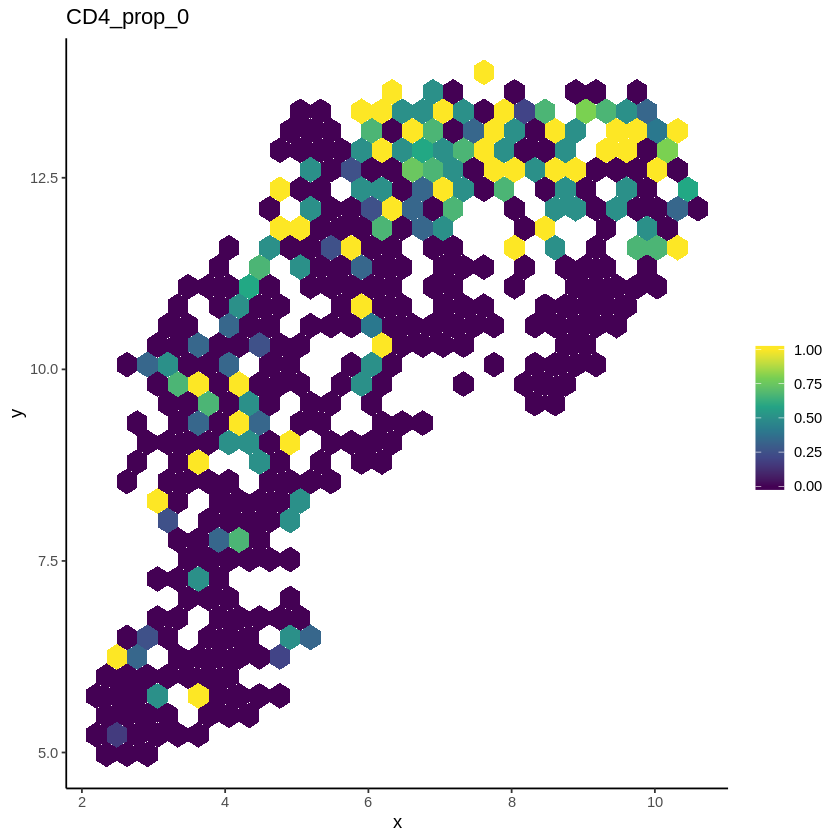

In [72]:
p1 <- plot_hexbin_gene(data_schex, type='logcounts',gene='CD4',action='prop_0')
plot(p1)

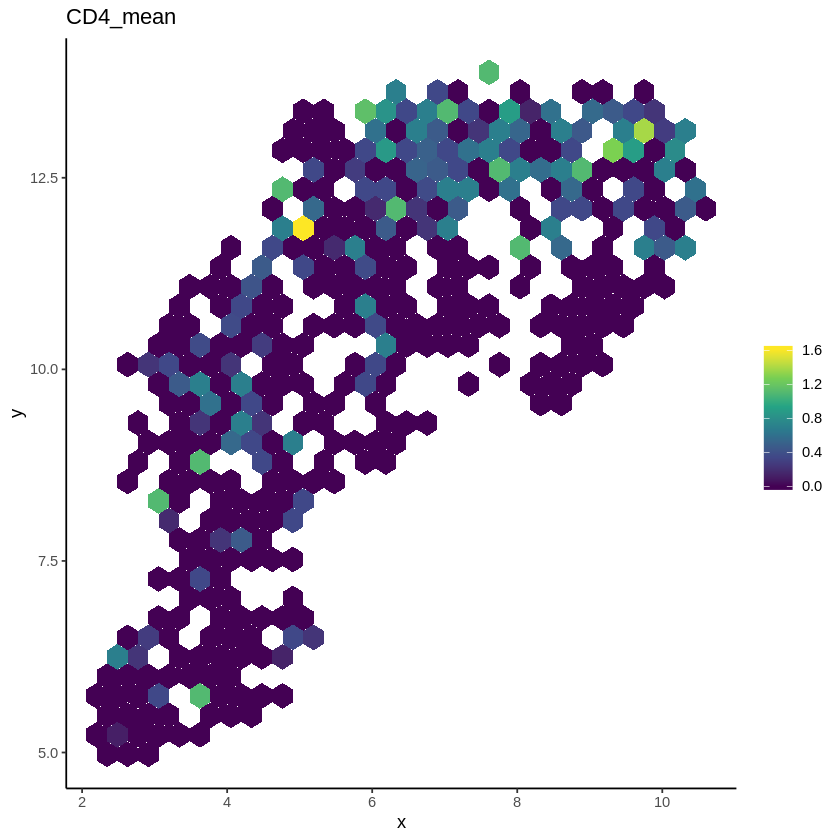

In [73]:
p1 <- plot_hexbin_gene(data_schex, type='logcounts',gene='CD4',action='mean')
plot(p1)

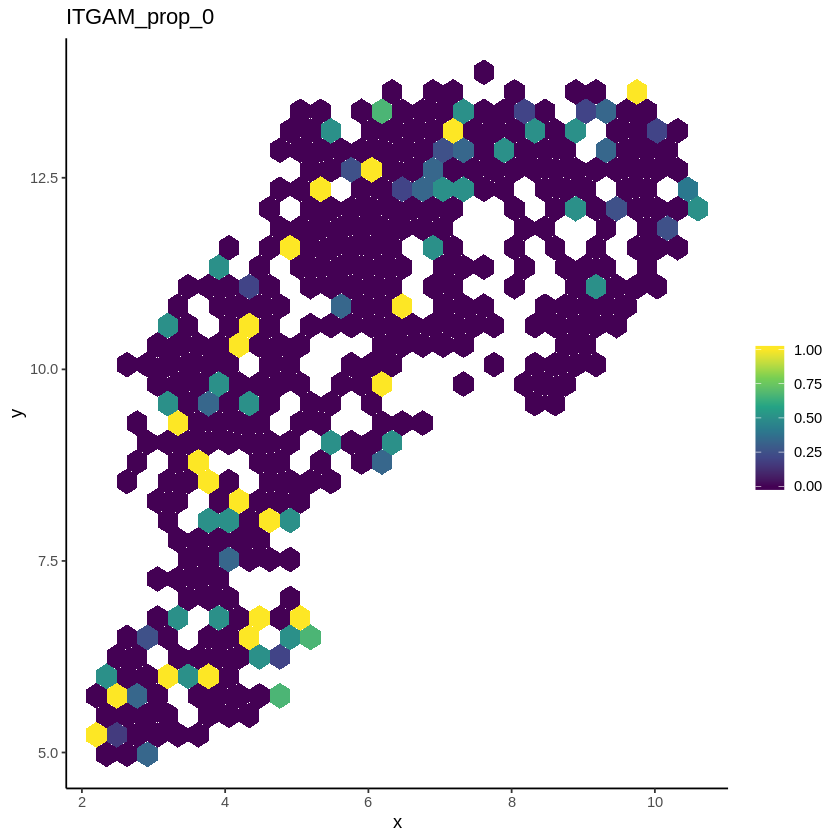

In [74]:
# ITGAM = CD11B
p1 <- plot_hexbin_gene(data_schex, type='logcounts',gene='ITGAM',action='prop_0')
plot(p1)

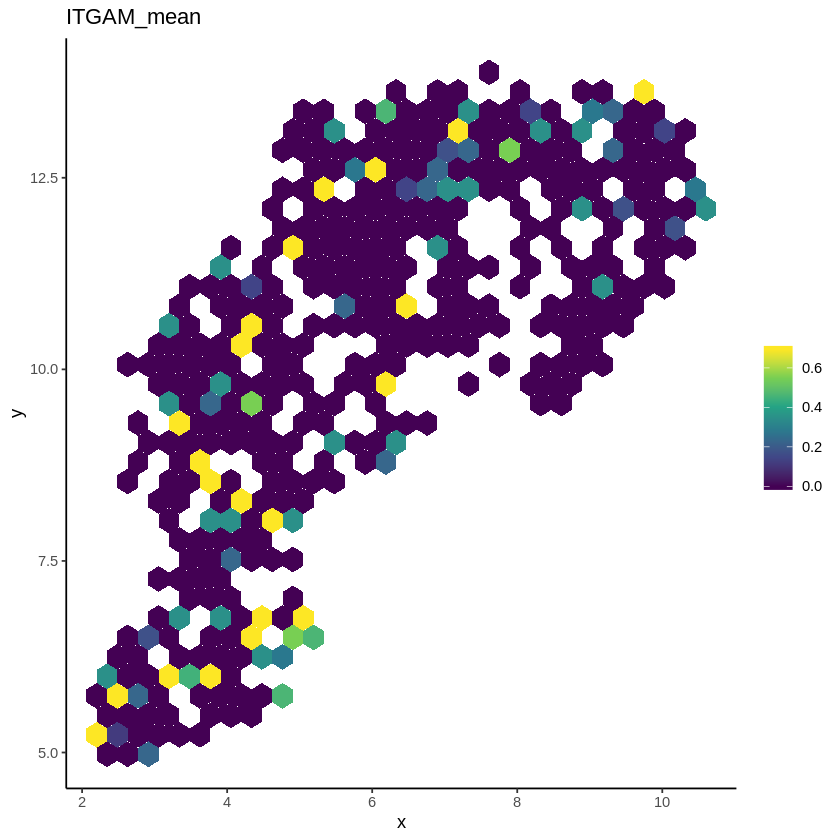

In [75]:
# ITGAM = CD11B
p1 <- plot_hexbin_gene(data_schex, type='logcounts',gene='ITGAM',action='mean')
plot(p1)

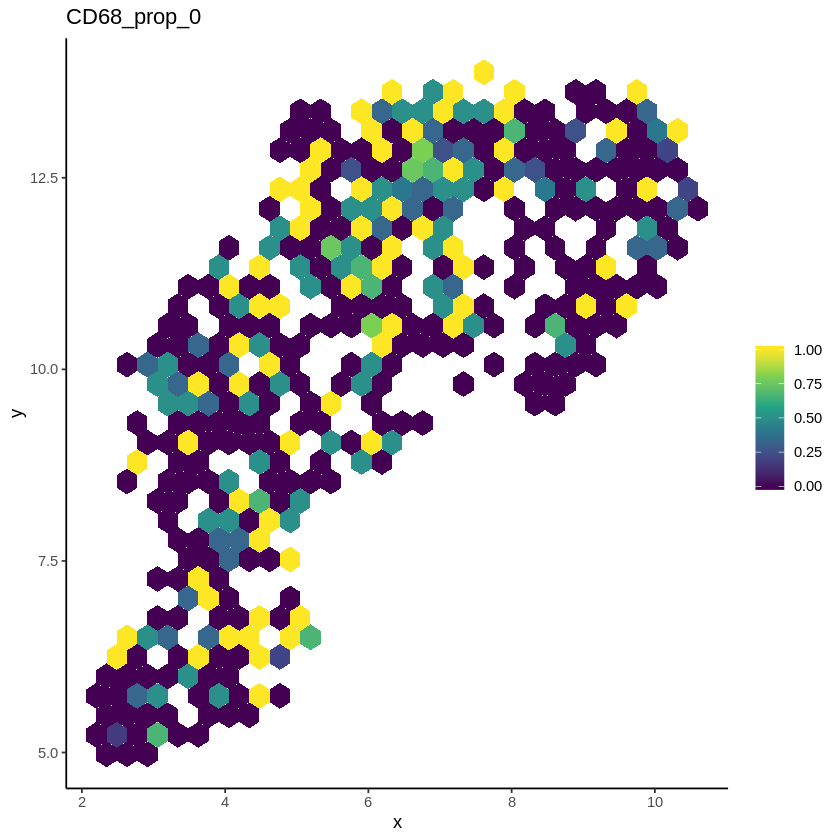

In [76]:
p1 <- plot_hexbin_gene(data_schex, type='logcounts',gene='CD68',action='prop_0')
plot(p1)

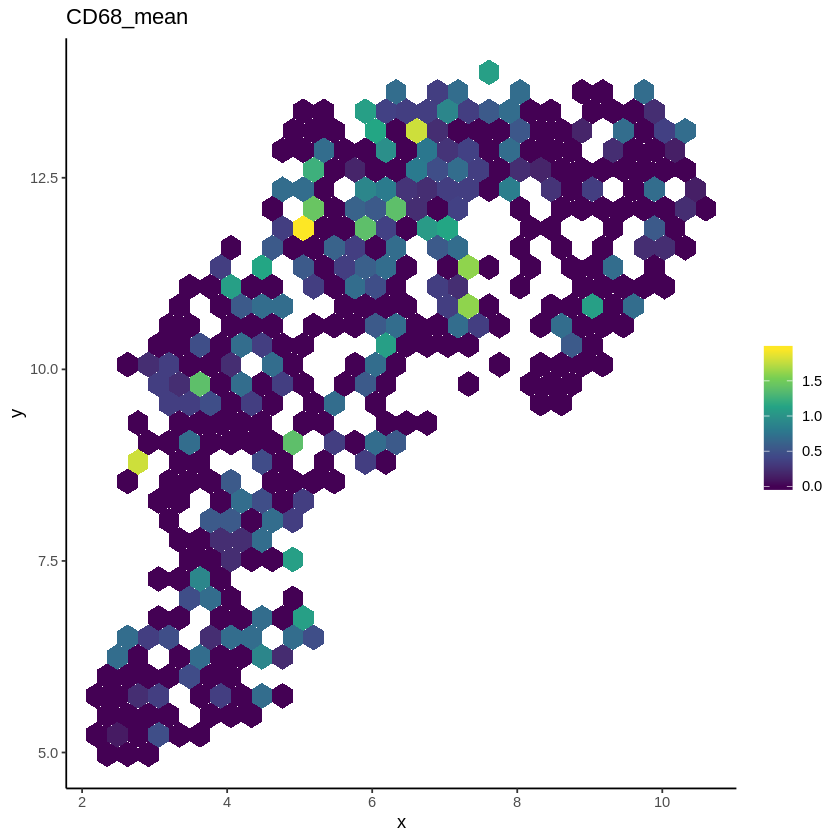

In [77]:
p1 <- plot_hexbin_gene(data_schex, type='logcounts',gene='CD68',action='mean')
plot(p1)

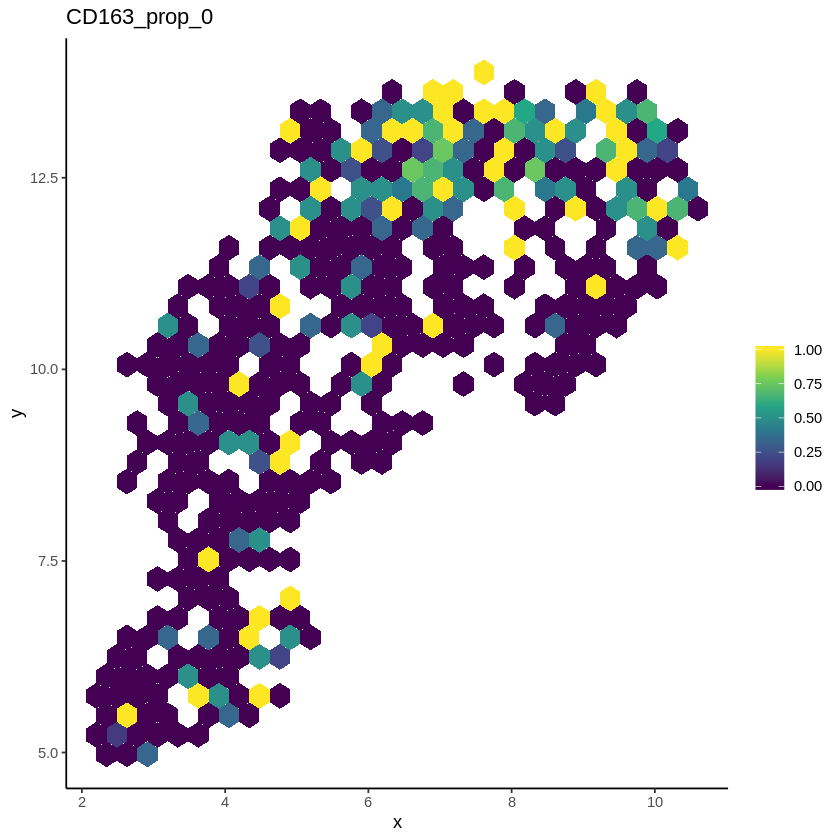

In [78]:
p1 <- plot_hexbin_gene(data_schex, type='logcounts',gene='CD163',action='prop_0')
plot(p1)

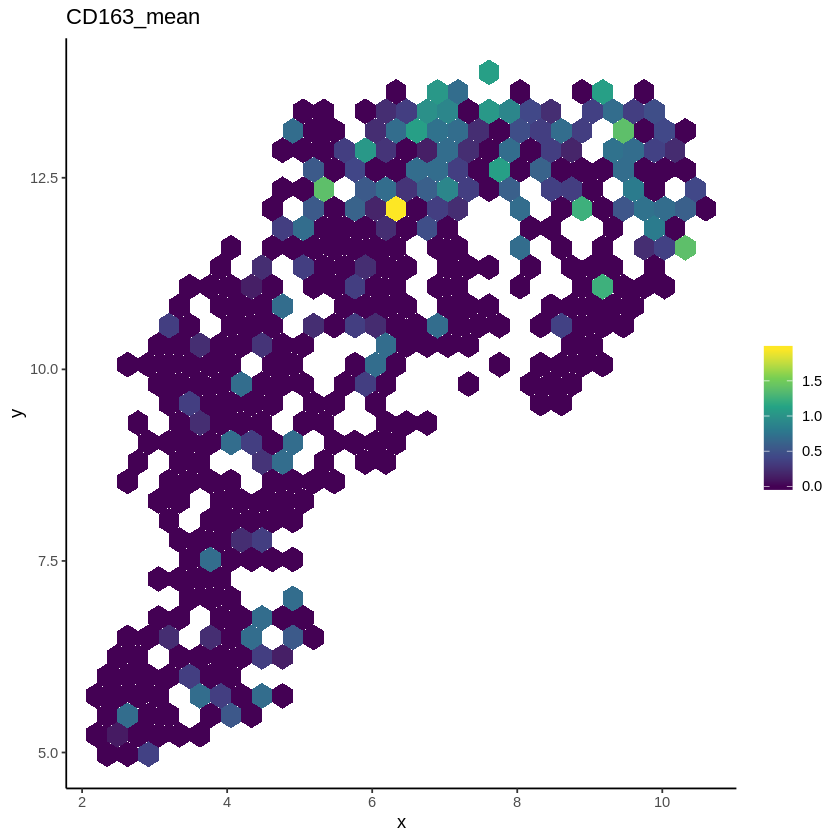

In [79]:
p1 <- plot_hexbin_gene(data_schex, type='logcounts',gene='CD163',action='mean')
plot(p1)

HLA-DRA

HLA-DRB1

HLA-DRB3

HLA-DRB4

HLA-DRB5

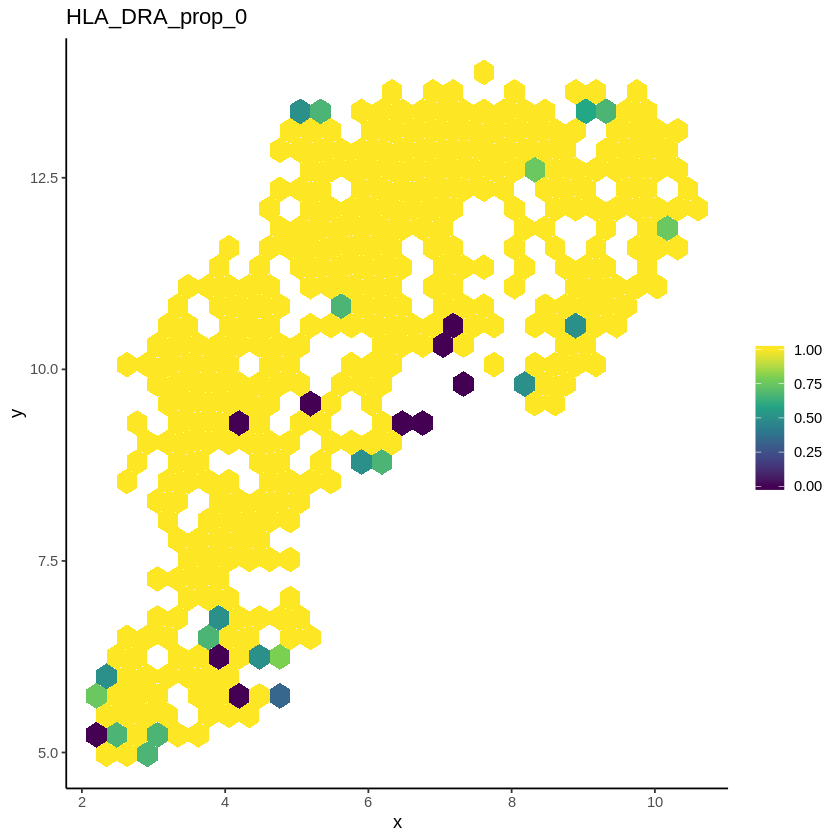

In [80]:
p1 <- plot_hexbin_gene(data_schex, type='logcounts',gene='HLA-DRA',action='prop_0')
plot(p1)

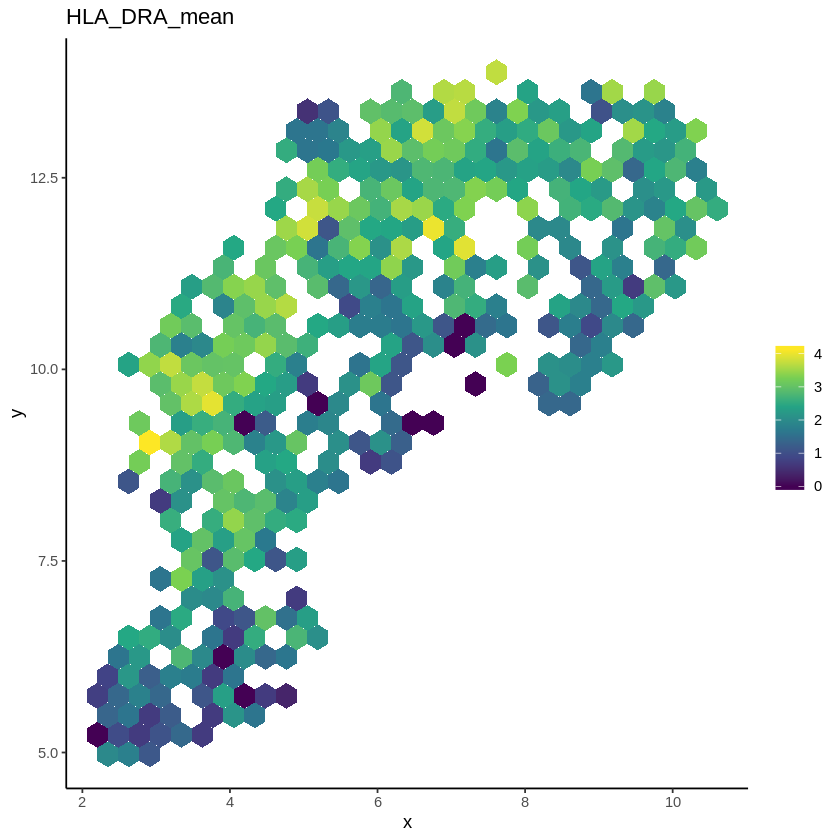

In [81]:
p1 <- plot_hexbin_gene(data_schex, type='logcounts',gene='HLA-DRA',action='mean')
plot(p1)

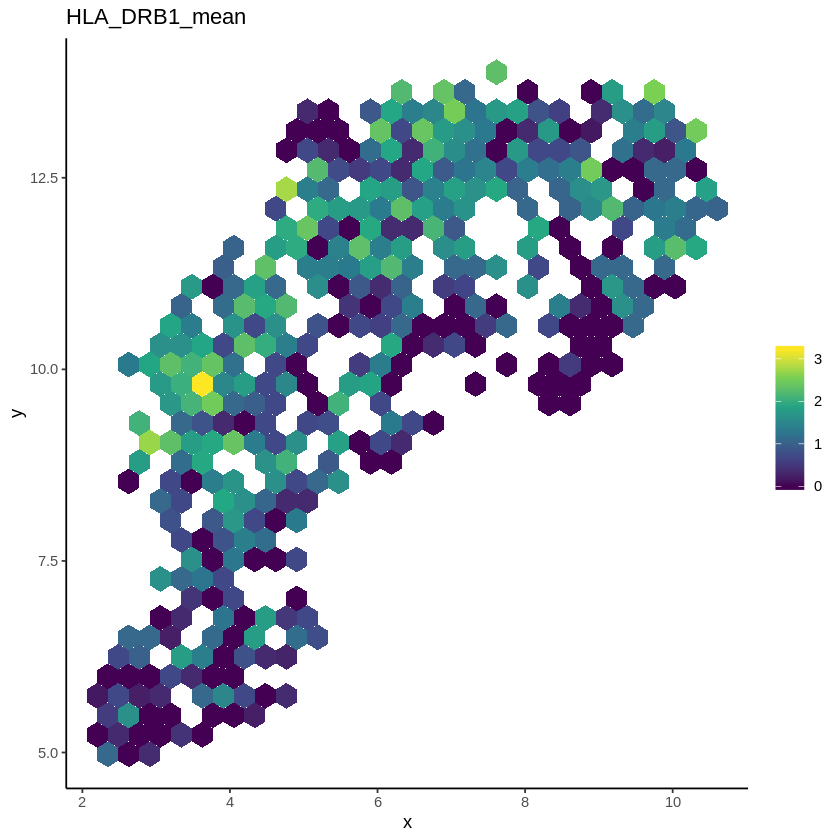

In [82]:
p1 <- plot_hexbin_gene(data_schex, type='logcounts',gene='HLA-DRB1',action='mean')
plot(p1)

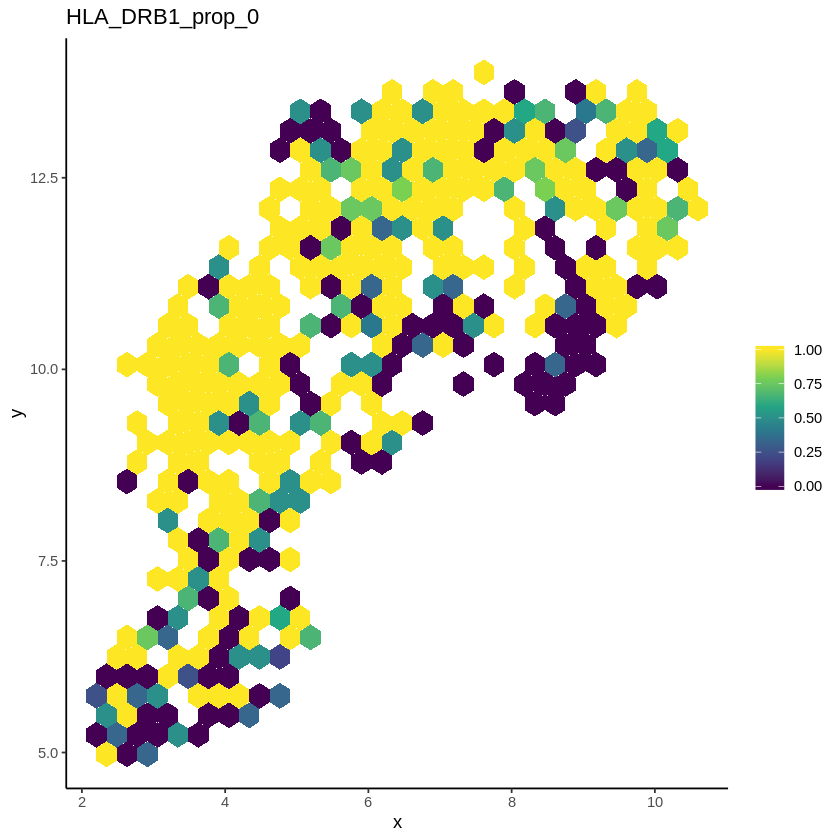

In [86]:
p1 <- plot_hexbin_gene(data_schex, type='logcounts',gene='HLA-DRB1',action='prop_0')
plot(p1)

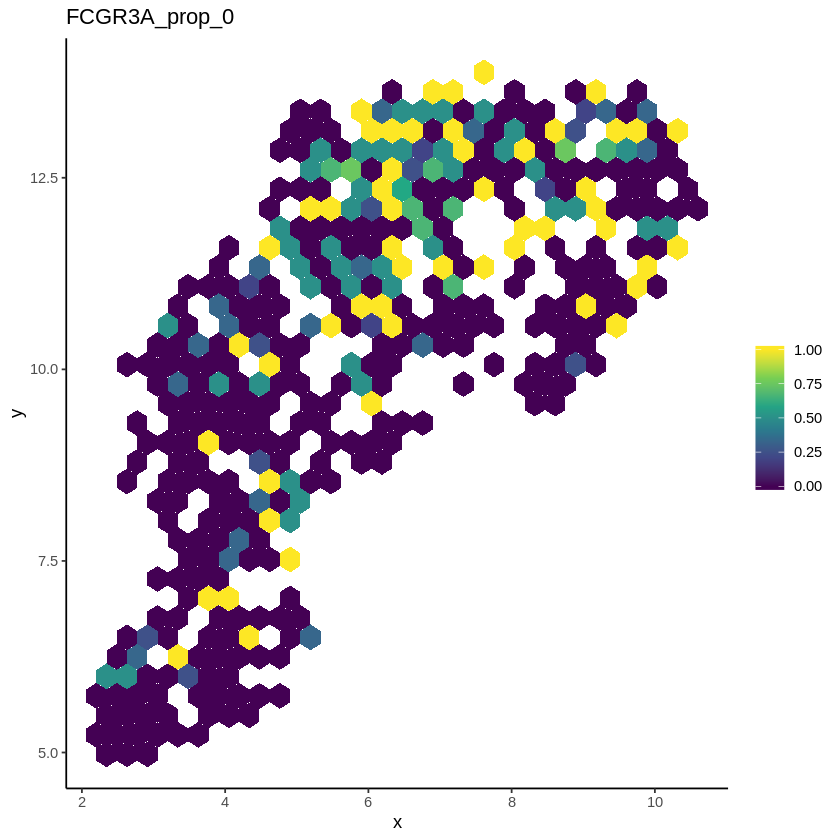

In [87]:
p1 <- plot_hexbin_gene(data_schex, type='logcounts',gene='FCGR3A',action='prop_0')
plot(p1)

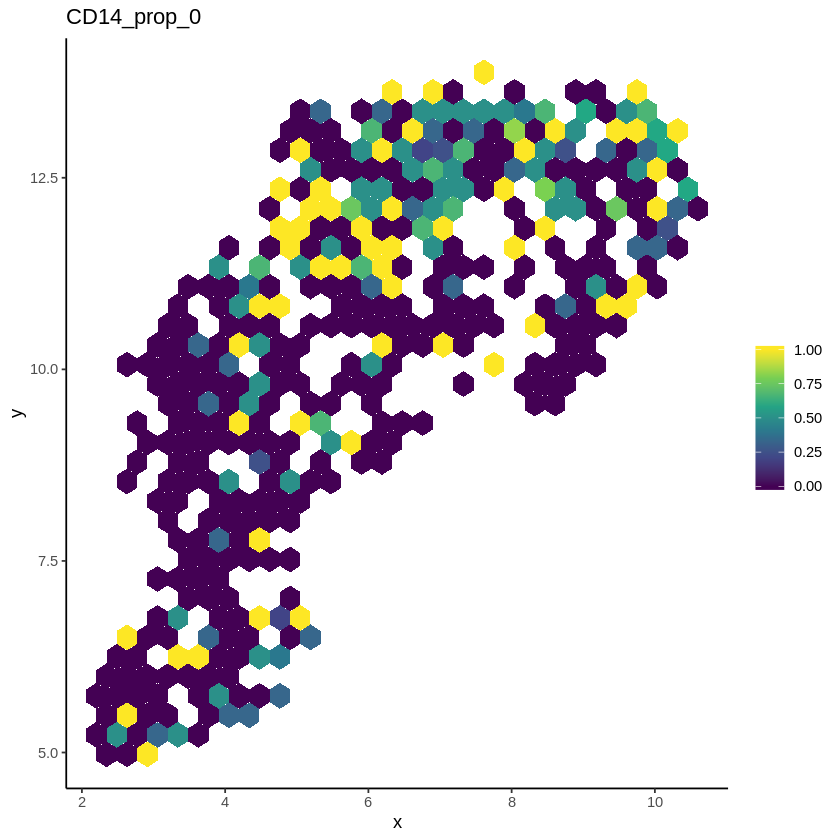

In [88]:
p1 <- plot_hexbin_gene(data_schex, type='logcounts',gene='CD14',action='prop_0')
plot(p1)

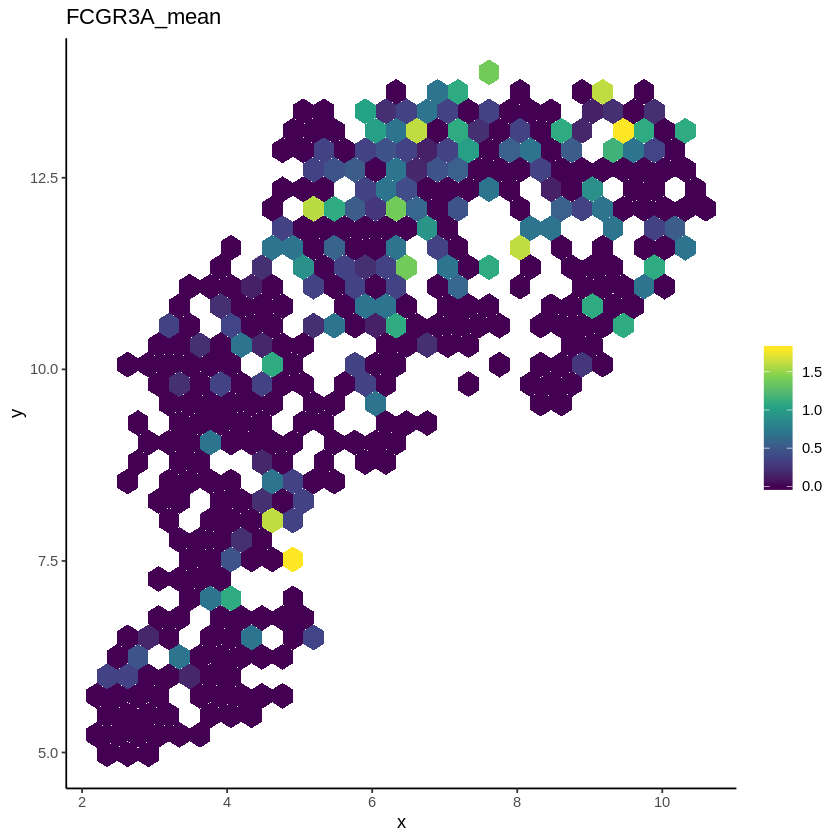

In [85]:
p1 <- plot_hexbin_gene(data_schex, type='logcounts',gene='FCGR3A',action='mean')
plot(p1)

In [89]:
all.markers <- FindAllMarkers(object = data.cluster13, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4



In [96]:
all.markers %>% group_by(cluster) %>% filter(cluster==0) %>% select(gene) -> a

Adding missing grouping variables: `cluster`



In [100]:
b <- list(a['gene'])

In [106]:
as.character(b)

[1] "list(gene = c(\"APOC1\", \"FTL\", \"APOE\", \"C1QB\", \"ADAMDEC1\", \"GPNMB\", \"NPC2\", \"PSAP\", \"LGMN\", \"CTSD\", \"CTSB\", \"C1QC\", \"FPR3\", \"LIPA\", \"MS4A6A\", \"SLCO2B1\", \"ACP5\", \"MARCKS\", \"C1QA\", \"PRDX1\", \"ASAH1\", \"MS4A4A\", \"CREG1\", \"LY96\", \"ABCA1\", \"GLUL\", \"CTSC\", \"ATP6V1F\", \"TYROBP\", \"TMEM176B\", \"CCL18\", \"GPR34\", \"SELENOP\", \"MAFB\", \"DAPK1\", \"MS4A7\", \"HLA-DRA\", \"ITM2B\", \"DNASE1L3\", \"PLD3\", \"LGALS3\", \"A2M\", \"LAPTM5\", \"HNMT\", \"DBI\", \"C1orf54\", \"HLA-DQA1\", \"FCER1G\", \"SGPL1\", \"DAB2\", \"CD9\", \"RB1\", \"CSTB\", \"MSR1\", \"LGALS1\", \n\"AXL\", \"SAT1\", \"HLA-DMA\", \"CD68\", \"CD74\", \"ATP6V0E1\", \"RAC1\", \"B2M\", \"FCGR3A\", \"HLA-DPA1\", \"CD63\", \"CTSZ\", \"TMSB4X\", \"ARL6IP1\", \"RNASE6\", \"AIF1\", \"CTSL\", \"CD36\", \"ATOX1\", \"YWHAH\", \"LPAR6\", \"FUCA1\", \"SDCBP\", \"STAT1\", \"IL18\", \"FCGRT\", \"STAB1\", \"MMP12\", \"CD81\", \"RGS1\", \"CALR\", \"GRN\", \"TPP1\", \"HLA-DRB1\", \"ALOX5AP\", \"FYB1\", \"TMEM176A\", \"RGS10\", \"FABP5\", \"PDK4\", \"MPEG1\", \"HLA-DPB1\", \"S100A11\", \"SLC40A1\", \"VAMP8\", \"ATP5F1E\", \"HLA-DQB1\", \"TUBA1B\", \"UCP2\", \"CD14\", \"HLA-DRB5\", \"CST3\"))"

In [105]:
all.markers %>% group_by(cluster) %>% filter(cluster==1) %>% select(gene) -> a

Adding missing grouping variables: `cluster`



In [107]:
b <- list(a['gene'])

In [108]:
as.character(b)

[1] "list(gene = c(\"TMSB10\", \"SH3BGRL3\", \"PTMA\", \"LGALS2\", \"LSP1\", \"S100A11\", \"S100A10\", \"CFL1\", \"HLA-DPB1\", \"RPL27A\", \"HLA-DQB1\", \"CD52\", \"RPS2\", \"RPS23\", \"PFN1\", \"RPL10A\", \"RPS19\", \"RPL28\", \"ACTB\", \"LGALS1\", \"RPS18\", \"RPS8\", \"RPL19\", \"RPS15A\", \"PPA1\", \"RPL37A\", \"RPL10\", \"RPS5\", \"HLA-DQA2\", \"RPL3\", \"TXN\", \"ACTG1\", \"COTL1\", \"RPS17\", \"RPS3A\", \"HLA-DRB1\", \"HLA-DRA\", \"LYZ\", \"CRIP1\"))"

In [110]:
all.markers %>% group_by(cluster) %>% filter(cluster==2) %>% select(gene) -> a

Adding missing grouping variables: `cluster`



In [111]:
b <- list(a['gene'])

In [112]:
as.character(b)

[1] "list(gene = c(\"IL1B\", \"S100A8\", \"EREG\", \"CXCL8\", \"NAMPT\", \"G0S2\", \"SLC2A3\", \"VCAN\", \"S100A12\", \"CXCL2\", \"NFKBIA\", \"S100A9\", \"NFKBIZ\", \"FCN1\", \"IER3\", \"PTGS2\", \"BCL2A1\", \"CD55\", \"NR4A2\", \"FOSB\", \"S100A4\", \"ZFP36\", \"VEGFA\", \"DUSP1\", \"SRGN\", \"SOCS3\", \"TIMP1\", \"CCL20\", \"FOSL2\", \"AREG\", \"TWISTNB\", \"MXD1\", \"BTG1\", \"TNFAIP3\", \"S100A6\", \"IL1RN\", \"THBS1\", \"PNRC1\", \"SOD2\", \"FOS\", \"OLR1\", \"CXCL3\", \"SERPINA1\", \"EGR1\", \"FTH1\", \"CEBPB\", \"BHLHE40\", \"PLAUR\", \"PHACTR1\", \"JUNB\", \"JUND\", \"CD83\", \"NEAT1\", \"C5AR1\", \"WTAP\", \n\"STXBP2\", \"HSPA1B\", \"VIM\", \"HSPA1A\", \"INSIG1\", \"EMP3\", \"CSTA\", \"LYZ\", \"MCL1\", \"RPL34\", \"H3F3A\", \"CD44\", \"RGS2\", \"GPR183\", \"AP1S2\", \"S100A10\", \"CCL3\", \"AC020656.1\", \"H3F3B\", \"C15orf48\", \"MT2A\"))"

In [113]:
all.markers %>% group_by(cluster) %>% filter(cluster==3) %>% select(gene) -> a

Adding missing grouping variables: `cluster`



In [114]:
b <- list(a['gene'])

In [115]:
as.character(b)

[1] "list(gene = c(\"RNASE1\", \"SELENOP\", \"STAB1\", \"SLC40A1\", \"MT-ND3\", \"F13A1\", \"MT-CO3\", \"C1QA\", \"MAF\", \"LGMN\", \"MT-ND1\", \"MT-CYB\", \"MT-ND2\", \"MT-CO1\", \"MT-ND5\", \"MT-ND4\", \"MT-ATP6\", \"IGHA1\", \"JCHAIN\", \"DAB2\", \"SDC3\", \"IGKC\", \"MT-CO2\", \"CTSC\", \"MT-ND4L\", \"ITM2B\", \"CTSZ\", \"PSAP\", \"GKN1\", \"CD14\", \"LMNA\", \"KLF6\"))"

In [116]:
all.markers %>% group_by(cluster) %>% filter(cluster==4) %>% select(gene) -> a

Adding missing grouping variables: `cluster`



In [117]:
b <- list(a['gene'])

In [118]:
as.character(b)

[1] "list(gene = c(\"MT-ND2\", \"IGKC\", \"MT-ND4\", \"MT-CO3\", \"JCHAIN\", \"MT-ATP6\", \"MT-CO2\", \"MT-ND3\", \"IGLC2\", \"IGHA2\", \"MT-CO1\", \"IGHA1\", \"IGHG4\", \"IGLC3\", \"MT-CYB\", \"MT-ND1\", \"MT-ND5\", \"IGHG1\", \"RPL21\", \"RPL7A\", \"RPL5\", \"RPLP0\", \"IGHM\", \"IGHG3\", \"TSC22D3\", \"RPL14\", \"RPL18\", \"RPL17\", \"RPS7\", \"RPL3\", \"HNRNPA1\", \"NACA\", \"NPM1\", \"EEF2\", \"ZFP36L2\", \"TXNIP\", \"RPS4X\", \"RPL10A\", \"RPS3A\", \"RPL4\", \"TPT1\"))"